# Parcial 3

## Punto 1

### Librerías y definición de parámetros

In [1]:
#librerías
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
import time 
import mpmath as mp
from PIL import Image

#unidades
um=1e-6
mm=1e-3
nm=1e-9
#tamaño de píxel
dx=dy=1.48*mm #equivalencia con el mundo físico (M/4.2 metros)

### Importe de la imagen

In [2]:
cuadro=cv2.imread("gala-desnuda-mirando2.jpg",cv2.IMREAD_GRAYSCALE)
print(np.shape(cuadro))
#plt.imshow(cuadro,cmap='Greys')
#plt.show

(2835, 2182)


### Padding de la imagen

In [3]:
cuadropad = cv2.copyMakeBorder(cuadro, 1, 0, 327, 327, cv2.BORDER_CONSTANT, None, value = 0)
print(np.shape(cuadropad))
#plt.imshow(cuadropad,cmap='Greys')
#plt.show

(2836, 2836)


### Transformada de Fourier de la imagen

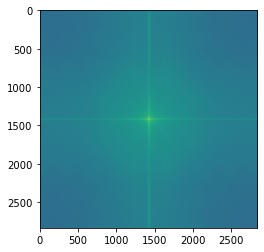

In [4]:
%matplotlib inline
cuadro_freq=np.fft.fftshift(np.fft.fft2(cuadropad))
#print(np.shape(cuadro_freq))
plt.figure()
plt.imshow(np.log(np.abs(cuadro_freq)))
plt.show()

### Máscara en el plano de Fourier 

0.000264379381983232


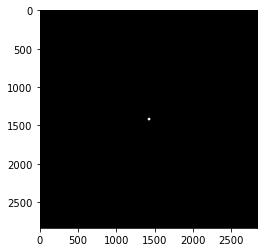

In [5]:
%matplotlib inline

z=100 # con este se cambia la distancia entre el cuadro y el observador

M=2836 
l=633*nm
tp=2*mm

f=15*mm*z/(z+20*mm)
na=tp/(np.sqrt(f**2+tp**2))

dxn=(l*z)/(dx*M)
dyn=dxn
x = np.arange(-M/2,M/2, 1)
y = np.arange(-M/2,M/2, 1)
fx=x*dxn
fy=y*dyn
xx, yy = np.meshgrid(fx, fy)
rad=tp*na
print(rad)

disco5=np.array(xx**2+yy**2<=rad**2,dtype=bool)
mask2=disco5
plt.gray()
plt.imshow(mask2, cmap='gray')

In [6]:
sol=cuadro_freq*mask2

### Transformada inversa 

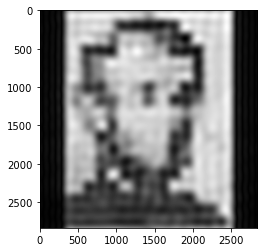

In [7]:
#%matplotlib qt #activar esto para verlo en una ventana emergente
sol2=np.fft.ifft2(sol)
plt.figure()
plt.imshow((np.abs(sol2)))
plt.show()

## Punto 3

### Librerías y definición de parámetros

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
import time 
import mpmath as mp

#Definición de unidades
    #Escalas
um=1e-6
mm=1e-3
nm=1e-9
    #Tamaño imagen
L = 6.513*mm #Lado del sensor    
w_length=633*nm #longitud de onda
    #Tamaño de pixel
dx=dy= (L/2048) #Tamaño del píxel del sensor a utilizar
DTR = 0.01745329252  # De grados a radianes 

### Función de ploteo complejo

In [9]:
#El indicador me dice si quiero retornar intensidad, amplitud o fase
def plot_complejo(mat,indicador, escala):
  #mat = mat es la compleja que vamos a graficar
  #indicador = I para intensidad, A para amplitud, P para fase
  #escala = 1 para nada, 0 para logaritmica
    if(indicador=="I"):
        mat = np.abs(mat)**2
    elif(indicador=="A"):
            mat = np.abs(mat)
    elif(indicador=="P"):
            mat = np.angle(math)
  
    if(escala==1):
        plt.figure()
        plt.imshow(mat)
        plt.show()
    else:
        plt.figure()
        plt.imshow(np.log(mat+0.00001))
        plt.show()
    return 0

### Propagación con Fresnel

In [10]:
def T_fre(U_f,dx_f,dy_f,z_f,wave_length):
    
    k= 2*np.pi/wave_length
    N_f,M_f=np.shape(U_f) 
    x=np.arange(-int(M_f/2),int(M_f/2),1) 
    y=np.arange(-int(N_f/2),int(N_f/2),1) 
    X,Y=np.meshgrid(x,y) 
    
     #dimensionando
    fX=X*(dx_f) 
    fY=Y*(dy_f)
    U_prima=(U_f*np.exp((-1j*k/(2*z_f))*((fX**2)+(fY**2)))) #U'
    U_dprima=np.fft.fftshift(np.fft.fft2(U_prima*dx_f**2)) #U''
    
    C1=np.exp(1j*k*z_f)/(1j*wave_length*z_f) #e^(ikz)/ilambda z #A
    C2=(1j*k)/(2*z_f)#ik/2 z
    
    fXs=X*(wave_length*z_f/(N_f*dx_f))
    fYs=Y*(wave_length*z_f/(M_f*dy_f))
    
    U_sal=C1*np.exp(C2*(fXs**2+fYs**2))*U_dprima

    return U_sal

### Onda de referencia

In [11]:
from numpy.lib.function_base import angle
def plane_wave(M,N,angleX,angleY,dx,dy,wave_length):

  Mcenter = int(M/2)
  Ncenter = int(N/2)

  x = np.arange(-Mcenter+1,Mcenter+1)
  y = np.arange(-Ncenter+1,Ncenter+1)
  
  X, Y = np.meshgrid(x,y)

  X = X*dx
  Y = Y*dy

  k = 2*np.pi/wave_length

  Ax = np.cos(angleX)
  Ay = np.cos(angleY)
  print(Ax)

  wave = np.exp(1j*k*(Ax*X+Ay*Y))

  return wave

### Lectura del holograma

(2048, 2048)

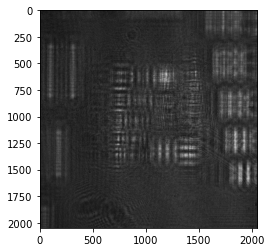

In [12]:
hol=cv2.imread("Hologram.tiff",cv2.IMREAD_UNCHANGED)
plt.imshow(hol)
np.shape(hol)

### Transformada de Fourier del holograma

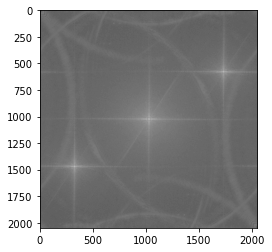

(2048, 2048)

In [13]:
FFT=np.fft.fft2(hol)
FFt_h=np.fft.fftshift(FFT)
plot_complejo(FFt_h,"I",0)
np.shape(FFt_h)

### Filtro 

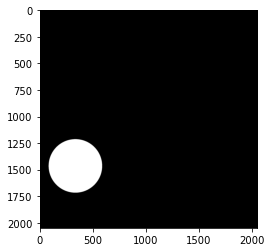

In [14]:
M=2048
x = np.arange(-M/2,M/2, 1)
y = np.arange(-M/2,M/2, 1)
fx=x*dx
fy=y*dy
xx, yy = np.meshgrid(fx, fy)
rad=800*um

disco5=np.array((xx+2200*um)**2+(yy-1400*um)**2<=rad**2,dtype=bool)
mask2=disco5
plt.gray()
plt.imshow(mask2, cmap='gray')

### Filtro por la transformada de Furier del holograma

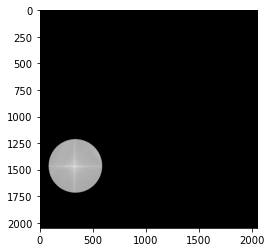

0

In [15]:
new =  FFt_h * mask2
plot_complejo(new,"I",0)

### Transformada inversa del holograma filtrado

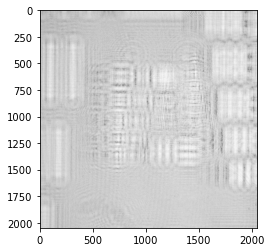

0.9663899781345132


In [16]:
FFTinv=np.fft.ifft2(new)
plot_complejo(FFTinv,'I',0)
onda = plane_wave(2048,2048,0.26,-0.559,dx,dy,633*nm)
S = FFTinv * onda

### Imagen resultante después de la propagación y rotada 90°

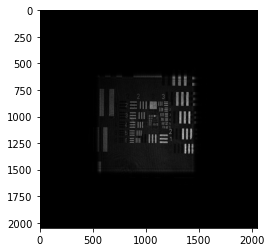

0

In [17]:
#%matplotlib qt #activar esto para verlo en una ventana emergente
final = T_fre(S,dx,dy,73*mm,633*nm)
rot = np.rot90(final,-1)
resultado = np.rot90(rot,-1)
plot_complejo(resultado,'I',1)